In [124]:
import re
from openpyxl import Workbook
from openpyxl import load_workbook 

wb = load_workbook("../搜狗新闻整理/总整理/sum_news.xlsx")

In [125]:
finance_sheet = wb["娱乐"]
print(finance_sheet.dimensions)

A1:A4001


In [126]:
# 转换为dataframe
# Convert to DataFrame
import pandas as pd
data = finance_sheet.values
columns = next(data)[0:]

df = pd.DataFrame(data, columns=columns)

In [127]:
df

Content
0     《剧剧有理》节目录制现场《剧剧有理》节目录制现场电视评论栏目《剧剧有理》今晚播出《剧剧有...
1     剧照：　陈键锋谭耀文反目成仇剧照：　陈紫函剧照：　陈紫函与陈键锋剧照：　谭耀文剧照：...
2     １０进８　高晓松看好樊博搜狐娱乐讯　７月２８日，山东卫视《天籁之声》将进行全国总决赛第四场...
3     搜狐娱乐讯　由娜仁花、韩童生、张桐、郝平等众多实力明星加盟的家庭轻喜剧《家事也是事》，正在北...
4     搜狐娱乐讯　据台湾媒体报道，吴宗宪１５日录华视《亚洲天团争霸战》，他说将做第２季，刚停播的中...
...                                                 ...
3995  《饥饿游戏》副海报《饥饿游戏》中文主海报科幻小说其实经常从历史中汲取营养，早年间阿西莫夫...
3996  《谍战深海》聂鑫剧照搜狐娱乐讯　《谍战深海》　由著名导演狄杰执导，王志文与刘佳强强合作主演...
3997  播出信息：故事梗概：戊戌变法刚刚失败，六君子菜市口血迹未干。裕泰茶馆少掌柜王利发从父亲手...
3998  搜狐娱乐讯　在结束由《闯关东》导演张新建联手作家梁晓声共同打造的４５集知青题材剧《知青》，在...
3999  任帅《我和老妈一起嫁》饰乔锐由光线传媒出品的大型都市家庭喜剧电视剧《我和老妈一起嫁》近日在...

[4000 rows x 1 columns]

In [128]:
#正则匹配去除数字、符号、空格
import re
from string import digits
#正则化
re_obj = re.compile(
    r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_`{|}~—！，。？、￥…（）：【】《》‘’“”\s]+")
re_obj2=re.compile(
    r'[a-zA-Z0-9’!"#$%&\'()*+,-.<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+')

def clear(text):
    res=re_obj.sub('', text)
    res =re.sub('[^\u4e00-\u9fa5]+','',text)
    return res


news = df
news['Content'] = news['Content'].apply(clear)
news.sample(5)

Content
877   真爱惹麻烦李颖剧照大型时尚偶像剧真爱惹麻烦正在三亚火热拍摄中该剧由台湾著名偶像剧导演沈怡亲自...
2665  奇道在节目现场照片奇道王的盛宴饰张良搜狐娱乐讯近日内地实力演员奇道受邀做客电视节目非常大名人...
1917  自年燃烧的地板舞蹈团诞生之日开始她便开始了轰轰烈烈的全球巡演之旅如今这一轰动全球的世界舞蹈颠...
461   来之不易的宣传片年奥组委宣传处的一位负责人主动找到张艺谋希望他能为申奥工作拍摄一部宣传片当时...
3608  电影没完没了导演冯小刚种类喜剧片内容简介老实厚道的出租汽车司机韩冬长年把车包租给旅行社老板阮...

In [129]:
#jieba分词
import jieba
def cut_word(text):
    return jieba.cut(text)
news['Content'] = news['Content'].apply(cut_word)
news.sample(5)

Content
1431  <generator object Tokenizer.cut at 0x0000010B6...
3226  <generator object Tokenizer.cut at 0x0000010B6...
981   <generator object Tokenizer.cut at 0x0000010B6...
1863  <generator object Tokenizer.cut at 0x0000010B6...
1078  <generator object Tokenizer.cut at 0x0000010B6...

In [130]:
#去除停用词
def get_stopword():
    s = set()
    with open('../all_stopwords.txt','r',encoding='UTF-8') as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopword(words):
    return [word for word in words if word not in stopword]

stopword = get_stopword()
news['Content'] = news['Content'].apply(remove_stopword)
news.sample(5)
news.head()

Content
0  [剧剧, 有理, 节目, 录制, 现场, 剧剧, 有理, 节目, 录制, 现场, 电视, 评...
1  [剧照, 陈键锋, 谭耀文, 反目成仇, 剧照, 陈紫函, 剧照, 陈紫函, 陈键锋, 剧照...
2  [进, 高晓松, 看好, 樊博, 搜狐, 娱乐, 讯, 山东, 卫视, 天籁, 之声, 全国...
3  [搜狐, 娱乐, 讯, 由娜, 仁花, 韩, 童生, 张桐, 郝, 平等, 众多, 实力, ...
4  [搜狐, 娱乐, 讯, 台湾, 媒体报道, 吴宗宪, 日录, 华视, 亚洲, 天团, 争霸战...

In [131]:
# 构建词云
from itertools import chain
from collections import Counter

li_2d = news['Content'].tolist()
li_1d = list(chain.from_iterable(li_2d))

# 二维列表转换为一维列表

print(f'总词汇量:{len(li_1d)}')
c= Counter(li_1d)
print(f'不重复词汇量:{len(c)}')
common = c.most_common(15)
print(common)

总词汇量:717661
不重复词汇量:71395
[('观众', 4010), ('电影', 3343), ('导演', 2589), ('饰演', 2535), ('搜狐', 2285), ('演员', 2145), ('更', 2128), ('剧中', 2081), ('娱乐', 2024), ('中国', 2018), ('角色', 1953), ('时', 1932), ('讯', 1890), ('节目', 1617), ('拍摄', 1573)]


In [132]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import cv2    #导入opencv
wc = WordCloud(font_path=r'C:\Windows\Fonts\simfang.ttf',width=800,height=600)

(-0.5, 799.5, 599.5, -0.5)

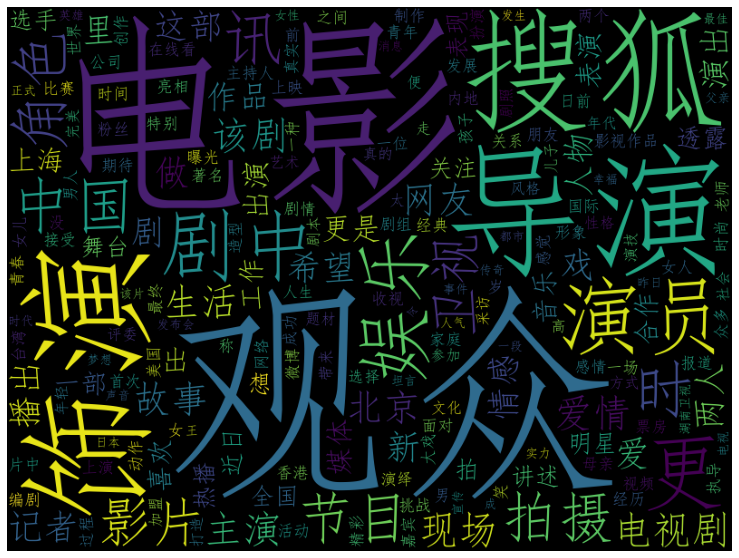

In [133]:
plt.figure(figsize=(15,10))
img = wc.generate_from_frequencies(c)
# generate_from_frequencies()该方法生成的词云图严格按照词汇出现频率
# 词汇出现频率越高，文字占比越大
# 传进去的参数为频数，前面不需要加空格处理
plt.imshow(img)
plt.axis('off')